# Text Analysis

In [1]:
!pip install nltk

## Importing the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import nltk

# download stopwords & punkt
nltk.download('stopwords')
nltk.download('punkt')

# vader useful for sentimental analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Data

In [3]:
df_wi21 = pd.read_csv('COGS108_feedback_Wi21.csv')
df_wi21['quarter'] = 'wi21'
df_wi21['enjoyed_most'] = df_wi21['enjoyed_most'].str.lower()
df_wi21['enjoyed_least'] = df_wi21['enjoyed_least'].str.lower()
df_wi21.head()

,enjoyed_most,enjoyed_least,quarter
0,i enjoy about learning python. i think learnin...,i really did not enjoy learning ethnic part. a...,wi21
1,mainly being able to explore the field of data...,since i have to say something i guess it'll be...,wi21
2,coding is funny,pdf lecture notes should be put on canvas,wi21
3,"i enjoy the ease of access to assignments, for...","at first, i felt that the data ethics or data ...",wi21
4,learning pandas and plots,final project,wi21


In [4]:
df_fa20 = pd.read_csv('COGS108_feedback_Fa20.csv')
df_fa20['quarter'] = 'fa20'
df_fa20['enjoyed_most'] = df_fa20['enjoyed_most'].str.lower()
df_fa20['enjoyed_least'] = df_fa20['enjoyed_least'].str.lower()
df_fa20.head(6)

,enjoyed_most,enjoyed_least,quiz_number,quiz_questions,a1,a2,proposal,quarter
0,"final project , l always wanted to analyze dat...",assignment is kind of difficult to me. i never...,The number we've had is about right.,I wish they were more straight from the notes/...,5.0,12.0,3.0,fa20
1,i liked learning about python and jupyter note...,"honestly, i am not a huge fan of remote learni...",The number we've had is about right.,I think they've been fine generally and would ...,2.0,3.0,7.0,fa20
2,the group project since i could work with my t...,i'm not familiar with python and panda.,The number we've had is about right.,I wish they were more straight from the notes/...,2.0,3.0,5.0,fa20
3,i really like the lectures were separated into...,hmmm i feel like i am a little bit lost on how...,The number we've had is about right.,I wish they were more straight from the notes/...,2.0,3.0,5.0,fa20
4,i've been really enjoying the assignments. the...,nothing really so far. it's been nice.,The number we've had is about right.,I wish they were more straight from the notes/...,2.0,3.0,2.0,fa20
5,the lectures are not boring like other classes.,on the homework’s i have to consistently strug...,There should be a way less.,I wish they were more straight from the notes/...,7.0,5.0,2.0,fa20


## Describe & Explore Data

In [5]:
print(df_wi21.shape, df_fa20.shape)

(314, 3) (321, 8)


### Missingness

In [6]:
df_wi21.isnull().sum()

enjoyed_most      0
enjoyed_least    10
quarter           0
dtype: int64

In [7]:
df_fa20.isnull().sum()

enjoyed_most      27
enjoyed_least     54
quiz_number        0
quiz_questions     0
a1                 0
a2                 0
proposal           0
quarter            0
dtype: int64

In [8]:
# fill missing data with 'No response'
def fill_no_response(df):
  df['enjoyed_most'] = df['enjoyed_most'].fillna('No response')
  df['enjoyed_least'] = df['enjoyed_least'].fillna('No response')

In [9]:
fill_no_response(df_wi21)
fill_no_response(df_fa20)

In [10]:
!pip install wordcloud
!pip install --upgrade Pillow

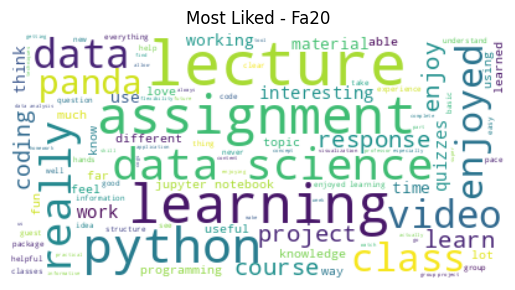

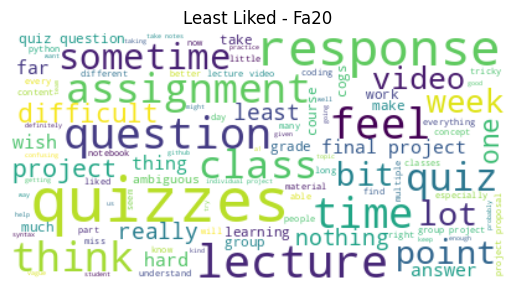

In [13]:
from wordcloud import WordCloud
df = df_fa20

most_liked = " ".join(review for review in df.enjoyed_most)
least_liked = " ".join(review for review in df.enjoyed_least)

# generate an image that contains 100 most frequent words with size corresponding to their frequency
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(most_liked)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Most Liked - Fa20')
plt.show()

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(least_liked)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Least Liked - Fa20')
plt.show()

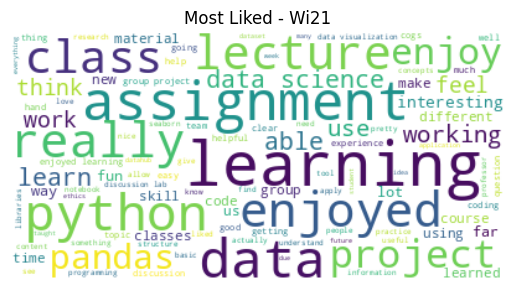

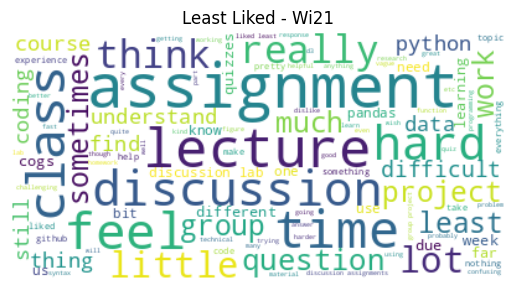

In [15]:
df = df_wi21

most_liked = " ".join(review for review in df.enjoyed_most)
least_liked = " ".join(review for review in df.enjoyed_least)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(most_liked)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Most Liked - Wi21')
plt.show()

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(least_liked)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Least Liked - Wi21')
plt.show()

## Sentiment Analysis

### Step 1: Tokenization

Tokenization is the first step in analyzing text.

1. Aquire text of interest
2. Break text down (tokenize) into **smaller chunks** (i.e. words, bigrams, sentences, etc.)

A **token** is a single entity - think of it as a building block of language.

### Tokenization Example

In [16]:
from nltk.tokenize import word_tokenize
df = df_wi21

In [17]:
# before tokenization
df.loc[25, 'enjoyed_most']

'the discussions and hw'

In [19]:
# after tokenization
tokenized_word = word_tokenize(df.loc[25, 'enjoyed_most'])
print(tokenized_word)

['the', 'discussions', 'and', 'hw']


In [20]:
df['most_token'] = df['enjoyed_most'].apply(word_tokenize)
df['least_token'] = df['enjoyed_least'].dropna().apply(word_tokenize)
df.head()

,enjoyed_most,enjoyed_least,quarter,most_token,least_token
0,i enjoy about learning python. i think learnin...,i really did not enjoy learning ethnic part. a...,wi21,"[i, enjoy, about, learning, python, ., i, thin...","[i, really, did, not, enjoy, learning, ethnic,..."
1,mainly being able to explore the field of data...,since i have to say something i guess it'll be...,wi21,"[mainly, being, able, to, explore, the, field,...","[since, i, have, to, say, something, i, guess,..."
2,coding is funny,pdf lecture notes should be put on canvas,wi21,"[coding, is, funny]","[pdf, lecture, notes, should, be, put, on, can..."
3,"i enjoy the ease of access to assignments, for...","at first, i felt that the data ethics or data ...",wi21,"[i, enjoy, the, ease, of, access, to, assignme...","[at, first, ,, i, felt, that, the, data, ethic..."
4,learning pandas and plots,final project,wi21,"[learning, pandas, and, plots]","[final, project]"


#### Step 2: Stop Words

**Stop words** are words that are of less interest to your analysis.

For example, you wouldn't expect the following words to be important: is, am, are, this, a, an, the, etc.

By removing stopwords, you can **lower the computational burden, focusing on only the words of interest.**

To do so in `nltk`, you need to create a list of stopwords and filter them from your tokens.


In [22]:
from nltk.corpus import stopwords
# only concerning the english stop words
stop_words = set(stopwords.words('english'))

print(stop_words)

{'as', 'doing', 'i', 'that', 'himself', 'on', 'when', 'ain', 'aren', 'hers', 'y', 'myself', "aren't", 'ma', 'how', 'ourselves', "you'll", 'nor', 'couldn', 'didn', 'all', 'does', 'wouldn', "hadn't", 'other', 'so', 'having', "weren't", 'hasn', 'our', 'but', 'up', 'hadn', 'at', 'each', 'have', 'once', 'm', 'her', 'both', 'those', 'such', 'yourself', 'll', "doesn't", 'you', 'his', 'ours', "you've", 't', 'off', 'about', 'now', 'mightn', "don't", 'same', 'him', 'am', 'to', 's', 'theirs', 'can', 'then', 'here', 'only', 'these', "isn't", 'are', "she's", 'won', 'mustn', 'itself', 'shouldn', "that'll", 'very', 'too', 'isn', "needn't", 'doesn', 'its', "haven't", 'below', 'he', "it's", 'themselves', 'do', 'just', "you're", 'and', 'in', 'should', "won't", 'yourselves', 'what', 'after', "shouldn't", 'no', 'where', 'my', 're', 'weren', 'against', 'why', "should've", 'until', 'any', 'd', 'has', 'before', 'some', 'she', 'over', "wouldn't", 'were', 've', 'being', 'with', 'under', "hasn't", 'out', "you'd

### Stop Words Example

In [23]:
filtered_sent = []
for w in tokenized_word:
  if w not in stop_words:
    filtered_sent.append(w)
print("Tokenized Sentence: ", tokenized_word)
print("Filtered Sentence: ", filtered_sent)

Tokenized Sentence:  ['the', 'discussions', 'and', 'hw']
Filtered Sentence:  ['discussions', 'hw']


In [24]:
df['most_stop'] = df['most_token'].apply(lambda x: [item for item in x if item not in stop_words])
df['least_stop'] = df['least_token'].apply(lambda x: [item for item in x if item not in stop_words])
df.head()

,enjoyed_most,enjoyed_least,quarter,most_token,least_token,most_stop,least_stop
0,i enjoy about learning python. i think learnin...,i really did not enjoy learning ethnic part. a...,wi21,"[i, enjoy, about, learning, python, ., i, thin...","[i, really, did, not, enjoy, learning, ethnic,...","[enjoy, learning, python, ., think, learning, ...","[really, enjoy, learning, ethnic, part, ., alt..."
1,mainly being able to explore the field of data...,since i have to say something i guess it'll be...,wi21,"[mainly, being, able, to, explore, the, field,...","[since, i, have, to, say, something, i, guess,...","[mainly, able, explore, field, data, science, ...","[since, say, something, guess, 'll, little, co..."
2,coding is funny,pdf lecture notes should be put on canvas,wi21,"[coding, is, funny]","[pdf, lecture, notes, should, be, put, on, can...","[coding, funny]","[pdf, lecture, notes, put, canvas]"
3,"i enjoy the ease of access to assignments, for...","at first, i felt that the data ethics or data ...",wi21,"[i, enjoy, the, ease, of, access, to, assignme...","[at, first, ,, i, felt, that, the, data, ethic...","[enjoy, ease, access, assignments, ,, instance...","[first, ,, felt, data, ethics, data, privacy, ..."
4,learning pandas and plots,final project,wi21,"[learning, pandas, and, plots]","[final, project]","[learning, pandas, plots]","[final, project]"


#### Step 3: Lexicon Normalization (**Stemming**)

In language, **many different words come from the same root word**.

For example, "intersection", "intersecting", "intersects", and "intersected" are all related to the common root word - "intersect".

**Stemming** is how **linguistic normalization** occurs - it **reduces words to their root words** (and chops off additional things like 'ing') - all of the above words would be reduced to their common stem "intersect."


### Stemming Example

In [26]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

stemmed_words = []
for w in filtered_sent:
  stemmed_words.append(ps.stem(w))

print("Filtered Sentence:", filtered_sent)
print("Stemmed Sentence:", stemmed_words)

Filtered Sentence: ['discussions', 'hw']
Stemmed Sentence: ['discuss', 'hw']


In [27]:
df['most_stem'] = df['most_stop'].apply(lambda x: [ps.stem(item) for item in x ])
df['least_stem'] = df['least_stop'].apply(lambda x: [ps.stem(item) for item in x ])
df.head()

,enjoyed_most,enjoyed_least,quarter,most_token,least_token,most_stop,least_stop,most_stem,least_stem
0,i enjoy about learning python. i think learnin...,i really did not enjoy learning ethnic part. a...,wi21,"[i, enjoy, about, learning, python, ., i, thin...","[i, really, did, not, enjoy, learning, ethnic,...","[enjoy, learning, python, ., think, learning, ...","[really, enjoy, learning, ethnic, part, ., alt...","[enjoy, learn, python, ., think, learn, panda,...","[realli, enjoy, learn, ethnic, part, ., althou..."
1,mainly being able to explore the field of data...,since i have to say something i guess it'll be...,wi21,"[mainly, being, able, to, explore, the, field,...","[since, i, have, to, say, something, i, guess,...","[mainly, able, explore, field, data, science, ...","[since, say, something, guess, 'll, little, co...","[mainli, abl, explor, field, data, scienc, too...","[sinc, say, someth, guess, 'll, littl, confus,..."
2,coding is funny,pdf lecture notes should be put on canvas,wi21,"[coding, is, funny]","[pdf, lecture, notes, should, be, put, on, can...","[coding, funny]","[pdf, lecture, notes, put, canvas]","[code, funni]","[pdf, lectur, note, put, canva]"
3,"i enjoy the ease of access to assignments, for...","at first, i felt that the data ethics or data ...",wi21,"[i, enjoy, the, ease, of, access, to, assignme...","[at, first, ,, i, felt, that, the, data, ethic...","[enjoy, ease, access, assignments, ,, instance...","[first, ,, felt, data, ethics, data, privacy, ...","[enjoy, eas, access, assign, ,, instanc, ,, co...","[first, ,, felt, data, ethic, data, privaci, s..."
4,learning pandas and plots,final project,wi21,"[learning, pandas, and, plots]","[final, project]","[learning, pandas, plots]","[final, project]","[learn, panda, plot]","[final, project]"


#### Step 4: Frequency Distribution

It can be helpful to get a sense of which words are **most frequent** in our dataset.

In [28]:
most = df['most_stem'].apply(pd.Series).stack()
least = df['least_stem'].apply(pd.Series).stack()
most

0    0       enjoy
     1       learn
     2      python
     3           .
     4       think
            ...   
313  0       learn
     1    incorpor
     2        data
     3      scienc
     4        live
Length: 4380, dtype: object

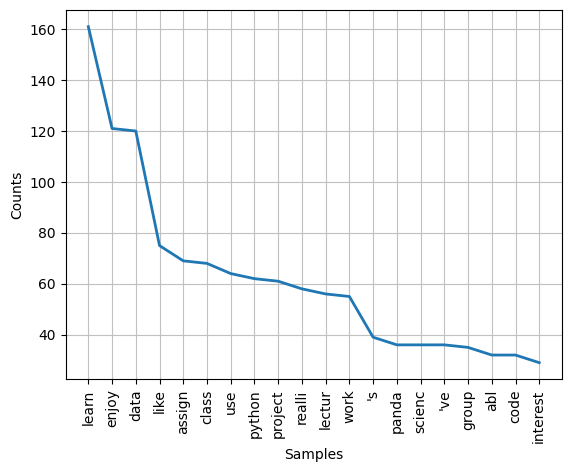

In [31]:
# FreqDist calculates the frequency of each word in the text
from nltk.probability import FreqDist
import string

fdist_most = FreqDist(most)
fdist_least = FreqDist(least)

# remove punctuation
for punc in string.punctuation:
  del fdist_most[punc]
  del fdist_least[punc]

# Frequency Distribution - top 20
fdist_most.plot(20, cumulative=False);

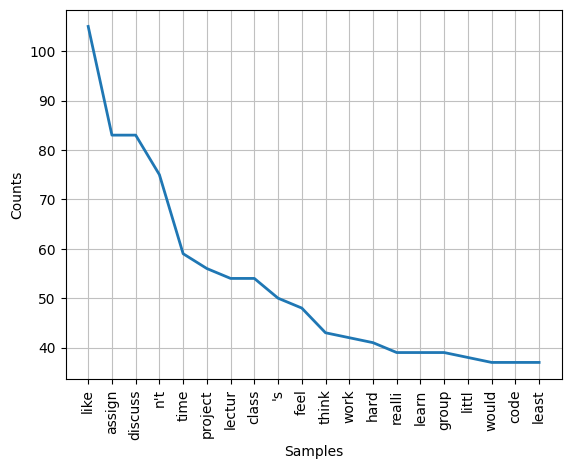

In [32]:
fdist_least.plot(20, cumulative=False);

#### Step 5: Sentiment Analysis!

**Sentiment Analysis** quantifies the content, idea, beliefs and opinions conveyed in text.

Two general approaches:

1. **Lexicon-based** - count **number of words** in a text belonging to each sentiment (positive, negative, happy, angry, etc.)
2. **Machine learning-based** - develop a **classification model** on **pre-labeled data**


### Sentiment Example

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

**VADER** handles:

- **capitalization** (great vs GREAT) & **punctuation** (exclamation makes more positive!)
- emojis and **emoticons**
- **degree modifiers** (extremely good vs. marginally good)
- **contractions** and **conjunctions** (but signals shift)

`pos` + `neg` + `neu` = 1

**`compound`** score - metric that calculates **sum of all the lexicon rating**s and **normalizes** between -1 (most extreme negative) and +1 (most extreme positive)
- positive: `compound` >= 0.05
- neutral: -0.05 < `compound` < 0.05
- negative : `compound` <= -0.05

In [34]:
analyzer.polarity_scores("The class is super cool")

{'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7351}

In [36]:
analyzer.polarity_scores("The class is not super cool.")

{'neg': 0.561, 'neu': 0.439, 'pos': 0.0, 'compound': -0.6259}

In [37]:
analyzer.polarity_scores("The class is NOT awful!")

{'neg': 0.0, 'neu': 0.591, 'pos': 0.409, 'compound': 0.416}

In [38]:
most_list = list(df['enjoyed_most'].values)
least_list = list(df['enjoyed_least'].values)
most_list

['i enjoy about learning python. i think learning pandas package enable me to clean my data in more efficient way. also, i achieve a better tool to express my data, when i learned data visualization.',
 "mainly being able to explore the field of data science and tools to work with and analyze real data out there in the world. i think it's cool to be able to work with the data to be able to deduce interesting stats or facts that are not easily seen without tools.",
 'coding is funny',
 'i enjoy the ease of access to assignments, for instance, completing assignments via datahub and canvas is very simple and convenient.',
 'learning pandas and plots',
 'coding is funny',
 'hand on experience and discussion about pandas and seaborn functions.',
 'i have enjoyed the case studies learning about interesting applications of data science.',
 'juypter notebook',
 'applying skills from cogs18 to real-world scenarios such as experimenting.  my python skills are not being exercised.',
 'the process

In [39]:
def get_sentiments(input_list):
  output = pd.DataFrame()

  for sentence in input_list:
    ss = analyzer.polarity_scores(sentence)
    ss['sentence'] = sentence

    df_dictionary = pd.DataFrame([ss])
    output = pd.concat([output, df_dictionary], ignore_index=True)

  return output

In [40]:
least_sentiments = get_sentiments(least_list)
most_sentiments = get_sentiments(most_list)

In [41]:
least_sentiments.head()

,neg,neu,pos,compound,sentence
0,0.135,0.589,0.277,0.7011,i really did not enjoy learning ethnic part. a...
1,0.043,0.957,0.000,-0.1548,since i have to say something i guess it'll be...
2,0.000,1.000,0.000,0.0000,pdf lecture notes should be put on canvas
3,0.111,0.889,0.000,-0.5588,"at first, i felt that the data ethics or data ..."
4,0.000,1.000,0.000,0.0000,final project


In [42]:
most_sentiments.head()

,neg,neu,pos,compound,sentence
0,0.000,0.686,0.314,0.8977,i enjoy about learning python. i think learnin...
1,0.037,0.872,0.091,0.4523,mainly being able to explore the field of data...
2,0.000,0.408,0.592,0.4404,coding is funny
3,0.000,0.759,0.241,0.6908,"i enjoy the ease of access to assignments, for..."
4,0.000,1.000,0.000,0.0000,learning pandas and plots


In [43]:
most_sentiments.describe()

,neg,neu,pos,compound
count,314.000000,314.000000,314.000000,314.000000
mean,0.009354,0.790051,0.200583,0.487116
std,0.031418,0.149279,0.149146,0.334970
min,0.000000,0.267000,0.000000,-0.855500
25%,0.000000,0.690000,0.097000,0.208300
50%,0.000000,0.788500,0.196000,0.548750
75%,0.000000,0.883750,0.293500,0.742500
max,0.281000,1.000000,0.733000,0.991400


In [44]:
least_sentiments.describe()

,neg,neu,pos,compound
count,314.000000,314.000000,314.000000,314.000000
mean,0.107287,0.796392,0.096315,0.070899
std,0.156674,0.175460,0.126956,0.454542
min,0.000000,0.000000,0.000000,-0.879900
25%,0.000000,0.727500,0.000000,-0.296000
50%,0.063500,0.822000,0.056500,0.000000
75%,0.155250,0.913750,0.147750,0.458800
max,1.000000,1.000000,0.753000,0.952900


## TF-IDF<br>
**Term Frequency - Inverse Document Frequency** (**TF-IDF**) sets out to identify the tokens **most unique to your document** of interest (relative to all documents in your corpus). <br>
This approach rescales the **frequency of words by how often they appear in all documents** so that the scores for frequency words such as "that are also frequent across all the documents are **penalized**".

**Term Frequency (TF)** - counts the **number of times a given word** (or token, term, etc) occurs in each document **divided by the number of words in that document**

**Inverse Document Frequency (IDF)** - weights the word by **their relative frequency across documents**.

$$IDF_{word} = log(\frac{\# documents}{\# \ documents\_containing\_word})$$
$$TF-IDF = TF \times IDF$$

***Note: words with a high TF-IDF are those with high frequency in one document & relatively low frequency in other documents***

### Bag of Words (BoW) approach

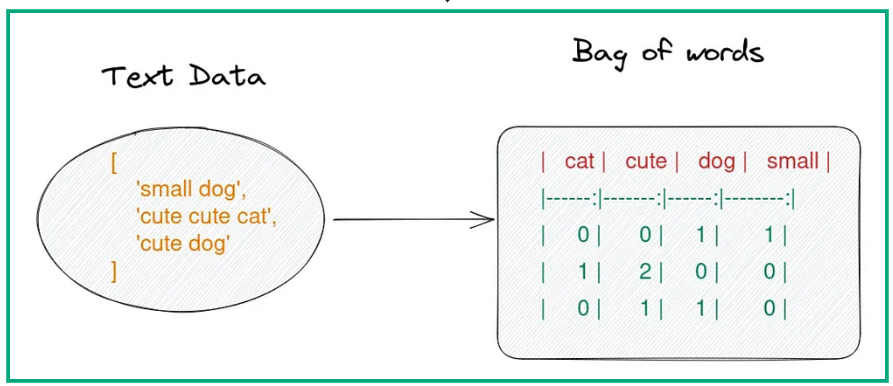

**Bag of Words** is a representation of text that describes the **occurences of words within a document**. It involves two things:
*   **A vocabulary of known words** (by counting **number of unique words** in the text data and **convert them into a vector** of length of this number while **each position corresponding to a unique word**)
*   **A measure of the presence of known words** (each sentence in the text data is converted into this **vector form** with **number representing of number of occurence for that word in that sentence**) <br>

***Notes: any information related to order or structure of words is ignored in this format.***



In [46]:
# lowercase text
least = list(map(str.lower, least_list))
most = list(map(str.lower, most_list))

# remove punctuation
for punc in string.punctuation:
  least = str(least).replace(punc, " ")
  most = str(most).replace(punc, " ")

# get list of two documents together
corpus = [str(least), str(most)]

In [47]:
corpus

['  i really did not enjoy learning ethnic part  although i think it is a very important topic  i still think it is kind of boring  i am glad the rest lectures are amazing and engaging     since i have to say something i guess it ll be that it can be a little confusing to know what exactly the assignments are asking for in some questions  or what specific method it wants us to use and how     pdf lecture notes should be put on canvas    at first  i felt that the data ethics or data privacy sections were unnecessary  however  i soon realized that they are valid concerns because neither i would like my data to be nonconsentially used and these are topics that are often undermined     final project    pdf lecture notes should be put on canvas    no response    the pace  but i understand this is an introductory course  and i did take the course for this reason  so this is not a valid criticism     discussion questions being vague    the difficulty of some packages such as pandas   some stu

In [48]:
# TfidfVectorizer transform text into vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# this basically does what I shown above
# first tokenizer the text and remove the stop words
# bag of words approach is used in this class while instead of storing frequency of words, it stores the calculated tf-idf value
tfidf = TfidfVectorizer(sublinear_tf=True, # apply sublinear TF scaling (0 for words not occured; else output normalized value for tf)
             analyzer='word', # specify analyzer
             max_features=2000, # max_features select the corresponding number of most frequent words
             tokenizer=word_tokenize, # specify tokenizer
             stop_words='english')

In [52]:
# calculate TF-IDF
cogs_tfidf = pd.DataFrame(tfidf.fit_transform(corpus).toarray())
cogs_tfidf.columns = tfidf.get_feature_names_out()
cogs_tfidf = cogs_tfidf.rename(index={0:'least', 1:'most'})
cogs_tfidf

,1,108,11,15,18,1950,2,3,4,5,...,writing,written,wrong,wrote,yield,zone,zones,zoom,—,’
least,0.048436,0.049072,0.000000,0.020298,0.034463,0.020298,0.040318,0.042544,0.024452,0.020298,...,0.020298,0.014442,0.048436,0.000000,0.020298,0.052965,0.020298,0.000000,0.020298,0.034463
most,0.000000,0.051829,0.022056,0.000000,0.037449,0.000000,0.026571,0.015693,0.015693,0.000000,...,0.000000,0.015693,0.000000,0.022056,0.000000,0.000000,0.000000,0.037345,0.000000,0.037449


In [55]:
cogs_tfidf.sort_values(by='most', axis=1, ascending=False)

,data,learning,enjoyed,like,python,assignments,really,class,ellis,project,...,kinda,kinds,lack,lead,leading,learnings,led,legitimate,length,leaving
least,0.063072,0.056184,0.030308,0.077545,0.060339,0.074504,0.067351,0.070647,0.000000,0.071505,...,0.034367,0.020298,0.056666,0.020298,0.020298,0.020298,0.020298,0.020298,0.020298,0.020298
most,0.090825,0.089460,0.083238,0.081203,0.080713,0.079683,0.079415,0.077397,0.076865,0.076769,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [56]:
cogs_tfidf.sort_values(by='least', axis=1, ascending=False)

,hard,quizzes,like,t,assignments,discussion,d3,s,project,class,...,rare,reading,fit,forcing,follow,recapping,recorded,flexible,flexibility,resources
least,0.095674,0.086429,0.077545,0.076986,0.074504,0.074277,0.07236,0.071505,0.071505,0.070647,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
most,0.000000,0.000000,0.081203,0.060156,0.079683,0.064202,0.00000,0.073972,0.076769,0.077397,...,0.022056,0.037345,0.022056,0.022056,0.057555,0.022056,0.046288,0.046288,0.046288,0.046288
